In [14]:
import numpy as np
m = np.zeros((100, 100), dtype='int')

In [15]:
for i in range(m.shape[0]):
    for j in range(m.shape[1]):
        m[i][j] = i + j

In [16]:
m

array([[  0,   1,   2, ...,  97,  98,  99],
       [  1,   2,   3, ...,  98,  99, 100],
       [  2,   3,   4, ...,  99, 100, 101],
       ...,
       [ 97,  98,  99, ..., 194, 195, 196],
       [ 98,  99, 100, ..., 195, 196, 197],
       [ 99, 100, 101, ..., 196, 197, 198]])

In [9]:
def mean_abs_error(y_pred, y_true):
    s = 0
    for p in range(len(y_pred)):
        s += abs(y_pred[p] - y_true[p])
    return s/len(y_pred)

In [18]:
def approx_matrix(M, n_components):
    U, s, V = np.linalg.svd(M)
    s = np.diag(s)
    U = U[:,  0:n_components]
    s = s[0:n_components, 0:n_components]
    V = V[0:n_components, :]
    return np.matmul(np.matmul(U, s), V)

In [11]:
a = np.array(
    [
        [1, 2, 3, 4],
        [5, 6, 7, 8],
        [9, 10, 11, 12],
        [13, 14, 15, 16],
    ]
)

print(approx_matrix(a, n_components=1))
print(approx_matrix(a, n_components=2))

[[ 2.22916951  2.46831501  2.70746051  2.94660601]
 [ 5.63832164  6.24320129  6.84808093  7.45296058]
 [ 9.04747378 10.01808757 10.98870135 11.95931514]
 [12.45662591 13.79297384 15.12932177 16.4656697 ]]
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]


In [19]:
n_components = range(1, 100)
all_errors = []
error = 0
for n in n_components:
    error = 0
    M_pred = approx_matrix(m, n)
    error = abs(M_pred - m).mean()
    all_errors.append(error)

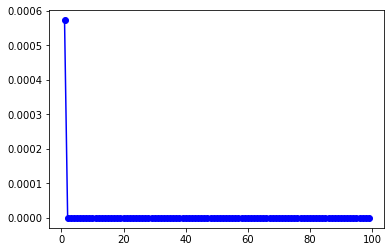

In [20]:
import matplotlib.pyplot as plt
plt.plot(n_components, np.array(all_errors) / 10000, marker='o', color='blue')#we have very little error beacuse our matrix has simple regularity and approximization works correctly